In [13]:
import pandas as pd
from pandas import json_normalize

In [51]:
df = pd.read_json('gapminder.json')

In [52]:
df = df.reset_index()

In [53]:
df = df.melt(id_vars='index').dropna()


In [54]:
df.reset_index(inplace=True, drop=True)

In [56]:
df_temp = pd.DataFrame([])
for index,row in df['value'].iteritems():
    df_temp = df_temp.append(json_normalize(row))
df_temp.reset_index(inplace=True, drop=True)
df = df.drop(columns='value')

In [57]:
df = pd.concat([df,df_temp], axis=1)

In [62]:
df = df.rename(columns={'index':'country','variable':'continent'})

In [65]:
df = df.melt(id_vars=['country','continent'])

In [75]:
df[['name','year']] = df['variable'].str.split('_', expand=True)

In [77]:
df.drop(columns='variable', inplace=True)

In [88]:
df.pivot_table(index=['country','continent','year'],columns='name',fill_value='value')

value                    
name                         gdpPercap lifeExp         pop
country     continent year                                
Afghanistan Asia      1952  779.445314  28.801   8425333.0
                      1957  820.853030  30.332   9240934.0
                      1962  853.100710  31.997  10267083.0
                      1967  836.197138  34.020  11537966.0
                      1972  739.981106  36.088  13079460.0
...                                ...     ...         ...
Zimbabwe    Africa    1987  706.157306  62.351   9216418.0
                      1992  693.420786  60.377  10704340.0
                      1997  792.449960  46.809  11404948.0
                      2002  672.038623  39.989  11926563.0
                      2007  469.709298  43.487  12311143.0

[1704 rows x 3 columns]

In [90]:
df_pivot.reset_index(inplace=True)

In [132]:
df_pivot.columns =df_pivot.columns.map(str)

In [133]:
df_pivot

,COUNTRY,CONTINENT,YEAR,GDPPERCAP,LIFEEXP,POP
0,Afghanistan,Asia,1952,779.445314,28.801,8425333.0
1,Afghanistan,Asia,1957,820.853030,30.332,9240934.0
2,Afghanistan,Asia,1962,853.100710,31.997,10267083.0
3,Afghanistan,Asia,1967,836.197138,34.020,11537966.0
4,Afghanistan,Asia,1972,739.981106,36.088,13079460.0
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,706.157306,62.351,9216418.0
1700,Zimbabwe,Africa,1992,693.420786,60.377,10704340.0
1701,Zimbabwe,Africa,1997,792.449960,46.809,11404948.0
1702,Zimbabwe,Africa,2002,672.038623,39.989,11926563.0


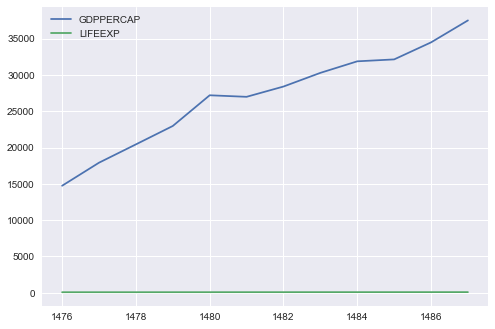

In [155]:
import matplotlib as plt

plt.style.use('seaborn')

df_pivot[df_pivot.COUNTRY == 'Switzerland'][['GDPPERCAP','LIFEEXP']].plot.line()